#### Since it was a real backend, there is noise and different EPC for same seed

In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import time

from qiskit.providers.aer import QasmSimulator


In [2]:
from qiskit import IBMQ
IBMQ.save_account('befca44219528a564b7f4d3f53707de8985c22fb7b8c969ef2728c830de7c612716e76f41fbc0a52d65f63e71a3a2437948befd3042b1ffab4ced07d573192f1')
IBMQ.load_account()
IBMQ.providers()


configrc.store_credentials:WARNING:2021-11-18 12:14:37,270: Credentials already present. Set overwrite=True to overwrite.


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='skku', project='squirl')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='skku', project='skku-graduate')>]

In [6]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                        not x.configuration().simulator and x.status().operational==True))
backend

UnicodeEncodeError: 'locale' codec can't encode character '\ub300' in position 21: encoding error

<IBMQBackend('ibmq_casablanca') from IBMQ(hub='ibm-q-skku', group='skku', project='squirl')>

In [7]:
#provider=IBMQ.providers()[1]
provider = IBMQ.get_provider(hub='ibm-q-skku', group='skku', project='squirl')
#backend=provider.backend.ibmq_lima
backend = provider.get_backend('ibmq_casablanca')

In [8]:
# get the basic feautures including qubit number of the backend.
config = backend.configuration()

print("This backend is called {0}, and is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}.{6} are the list of connected qubits"
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates,
                config.coupling_map))

This backend is called ibmq_casablanca, and is on version 1.2.47. It has 7 qubits. It supports OpenPulse programs. The basis gates supported on this device are ['id', 'rz', 'sx', 'x', 'cx', 'reset'].[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 5], [4, 5], [5, 3], [5, 4], [5, 6], [6, 5]] are the list of connected qubits


In [5]:
import numpy as np
from qiskit_experiments.library import StandardRB
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
from qiskit_experiments.library.randomized_benchmarking import RBUtils
import qiskit.circuit.library as circuits
import qiskit.ignis.verification.randomized_benchmarking as rb

# For simulation
from qiskit.providers.aer import AerSimulator

## Running 1-qubit RB experiment

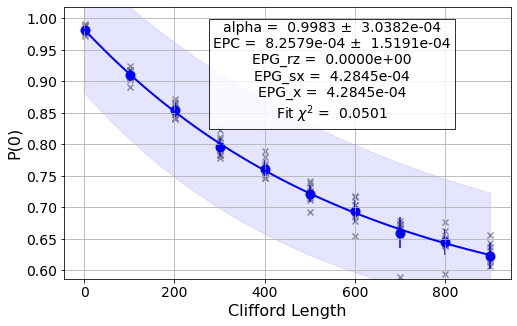

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.46298064 0.99834841 0.51978817] ± [0.04935099 0.00030382 0.05097554]
- χ²: 0.05014361370650968
- extra: <3 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9983484125555905 ± 0.00030382484405385075
- χ²: 0.05014361370650968
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0008257937222047596 ± 0.00015191242202692537
- χ²: 0.05014361370650968
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_rz
- value: 0.0
- χ²: 0.05014361370650968
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_sx
- value: 0.00042845286179127073
- χ²: 0.05014361370650968
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_x
- value: 0.00042845286179127073
- χ²: 0.05014361370650968
- device_components: ['Q0']
- verified: False


In [9]:
lengths = np.arange(1, 1000, 100)
num_samples = 10
seed = 1010
qubits = [0]

# Run an RB experiment on qubit 0
exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

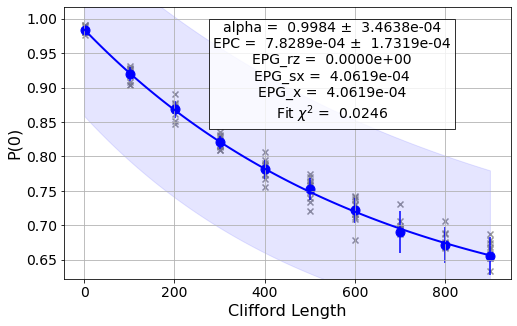

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.43411945 0.99843423 0.55041708] ± [0.06235549 0.00034638 0.06331697]
- χ²: 0.02455951483748357
- extra: <3 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.998434225279731 ± 0.0003463798095676099
- χ²: 0.02455951483748357
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0007828873601344877 ± 0.00017318990478380495
- χ²: 0.02455951483748357
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_rz
- value: 0.0
- χ²: 0.02455951483748357
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_sx
- value: 0.000406191426370111
- χ²: 0.02455951483748357
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_x
- value: 0.000406191426370111
- χ²: 0.02455951483748357
- device_components: ['Q0']
- verified: False


In [10]:
lengths = np.arange(1, 1000, 100)
num_samples = 10
seed = 1010
qubits = [0]

# Run an RB experiment on qubit 0
exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

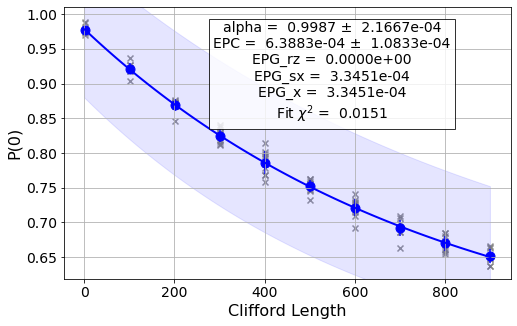

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.48007296 0.99872233 0.49839706] ± [0.04828587 0.00021667 0.05014275]
- χ²: 0.015095190524859846
- extra: <3 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9987223346384089 ± 0.00021666665985218875
- χ²: 0.015095190524859846
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0006388326807955647 ± 0.00010833332992609437
- χ²: 0.015095190524859846
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_rz
- value: 0.0
- χ²: 0.015095190524859846
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_sx
- value: 0.0003345120991737251
- χ²: 0.015095190524859846
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_x
- value: 0.0003345120991737251
- χ²: 0.015095190524859846
- device_components: ['Q0']
- verified: False


In [11]:
lengths = np.arange(1, 1000, 100)
num_samples = 10
seed = 1000
qubits = [0]

# Run an RB experiment on qubit 0
exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

400.5935022830963


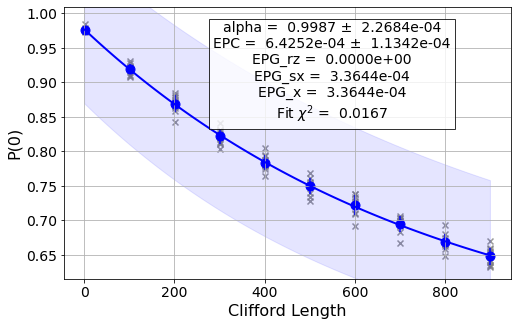

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.47785274 0.99871496 0.4991813 ] ± [0.05327616 0.00022684 0.05389932]
- χ²: 0.0167037326969735
- extra: <3 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.9987149582387219 ± 0.00022683757356933905
- χ²: 0.0167037326969735
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0006425208806390414 ± 0.00011341878678466952
- χ²: 0.0167037326969735
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_rz
- value: 0.0
- χ²: 0.0167037326969735
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_sx
- value: 0.0003364433520806321
- χ²: 0.0167037326969735
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_x
- value: 0.0003364433520806321
- χ²: 0.0167037326969735
- device_components: ['Q0']
- verified: False


In [12]:
lengths = np.arange(1, 1000, 100)
num_samples = 10
seed = 1000
qubits = [0]

# Run an RB experiment on qubit 0
exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
import time
start=time.time()
expdata1 = exp1.run(backend).block_for_results()
duration=time.time()-start
results1 = expdata1.analysis_results()

print(duration)
# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

440.1757538318634


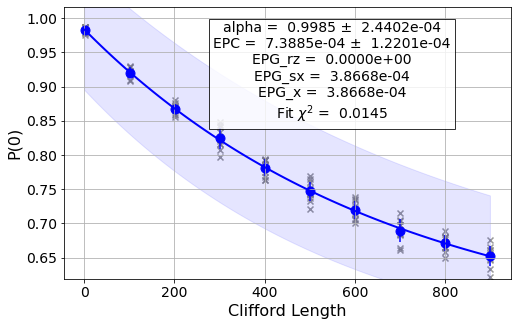

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.45106434 0.9985223  0.53270877] ± [0.04343143 0.00024402 0.04486701]
- χ²: 0.01449561998792485
- extra: <3 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.998522297032033 ± 0.0002440164197211239
- χ²: 0.01449561998792485
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.0007388514839835048 ± 0.00012200820986056195
- χ²: 0.01449561998792485
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_rz
- value: 0.0
- χ²: 0.01449561998792485
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_sx
- value: 0.00038668239073657044
- χ²: 0.01449561998792485
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: EPG_x
- value: 0.00038668239073657044
- χ²: 0.01449561998792485
- device_components: ['Q0']
- verified: False


In [13]:
lengths = np.arange(1, 1000, 100)
num_samples = 10
seed = 100
qubits = [0]

# Run an RB experiment on qubit 0
exp1 = StandardRB(qubits, lenghts, num_samples=num_samples, seed=seed)
import time
start=time.time()
expdata1 = exp1.run(backend).block_for_results()
duration=time.time()-start
results1 = expdata1.analysis_results()

print(duration)
# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

#### Fail when the list of lengths consists of just 1 sequence `lengths=[5]`

#### `lengths=[5,500,1000]`

186.17157697677612


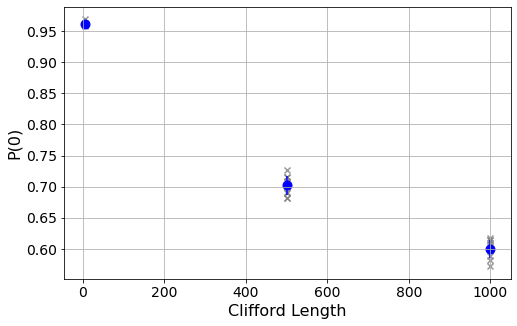

In [26]:
#lengths = np.arange(1, 1000, 100)
num_samples = 10
seed = 100
qubits = [0]

# Run an RB experiment on qubit 0
exp1 = StandardRB(qubits, lengths=[5,500,1000], num_samples=num_samples, seed=seed)
import time
start=time.time()
expdata1 = exp1.run(backend).block_for_results()
duration=time.time()-start
results1 = expdata1.analysis_results()

print(duration)
# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)